# **Churn Rate EDA, Balancing, Pre-processing, and ML**

In [69]:
import pandas as pd
import numpy as np
from scipy.stats import randint

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Analysis and Testing
from scipy import stats
from scipy.stats import normaltest

# Data Sampling and Balancing
from imblearn.over_sampling import SMOTE

# Data Preprocessing and Transformation
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

# Model Selection and Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Machine Learning Models and Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation and Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Pipeline and Workflow
from sklearn.pipeline import Pipeline

## ``1. Importing Data``

Here is the [kaggle dataset link](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn) as well as the data dictionary information.

In [33]:
data = pd.read_csv('Customer-Churn-Records.csv')

In [34]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [35]:
print(f'The data has {data.shape[1]} columns and {data.shape[0]} rows')

The data has 18 columns and 10000 rows


In [36]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [37]:
drop_columns = ['RowNumber', 'Surname']
data.drop(columns=drop_columns, inplace = True)
data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


Exploring the Data

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   CreditScore         10000 non-null  int64  
 2   Geography           10000 non-null  object 
 3   Gender              10000 non-null  object 
 4   Age                 10000 non-null  int64  
 5   Tenure              10000 non-null  int64  
 6   Balance             10000 non-null  float64
 7   NumOfProducts       10000 non-null  int64  
 8   HasCrCard           10000 non-null  int64  
 9   IsActiveMember      10000 non-null  int64  
 10  EstimatedSalary     10000 non-null  float64
 11  Exited              10000 non-null  int64  
 12  Complain            10000 non-null  int64  
 13  Satisfaction Score  10000 non-null  int64  
 14  Card Type           10000 non-null  object 
 15  Point Earned        10000 non-null  int64  
dtypes: fl

Checking for null values

In [39]:
data.isnull().sum()

CustomerId            0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [40]:
data.isna().sum()

CustomerId            0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [41]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.038000e-01,0.402842,0.00,0.00,0.000000e+00,0.000000e+00,1.00


## ``2. Exploratory Data Analysis``

### Correlation between variables:



We can see that **Complain has a perfect positive correlation with Costumer Chrun**

So let's remove it, since "Complain" doesn't provide any additional information or predictive power because it perfectly aligns with the target variabl and can introduce overfitting.

**Age has the highest correlation with Costumer Chrun (Positve)**

Which makes sense, since older people are less susceptible to change

<AxesSubplot:>

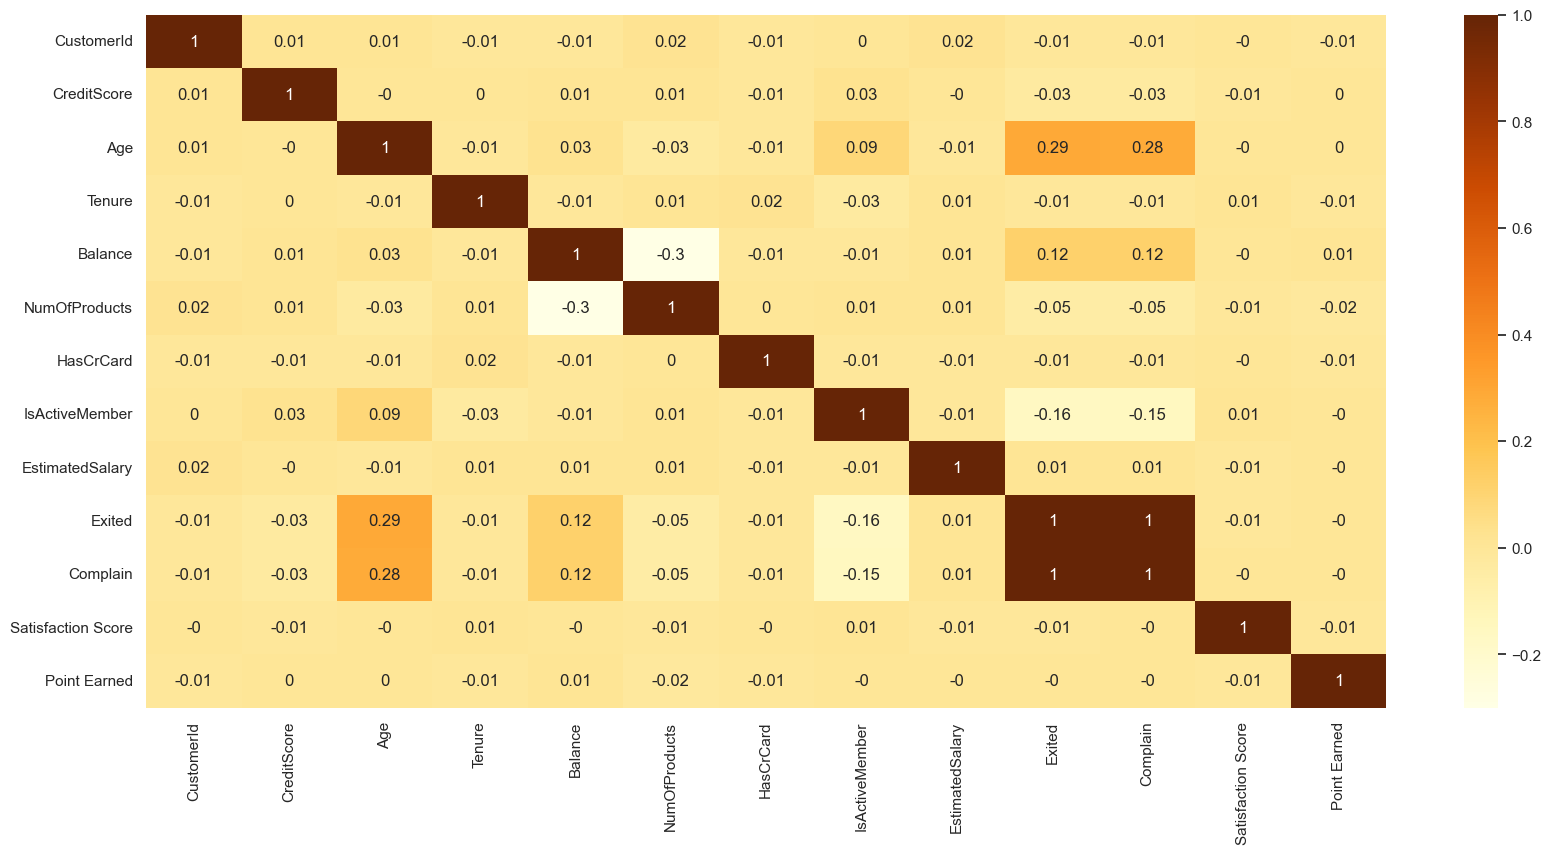

In [42]:
corr = data.corr().round(2)

plt.figure(figsize=(20,9))
sns.set_style("white")
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

In [43]:
data.drop(columns=['Complain'], inplace = True)

### Target Variable

**The Churn variable is imbalanced**. We will need to **perform a oversampling** to balance it.

Undersampling would not be a good approach, because it would result in losing a significant portion of the already limited data.

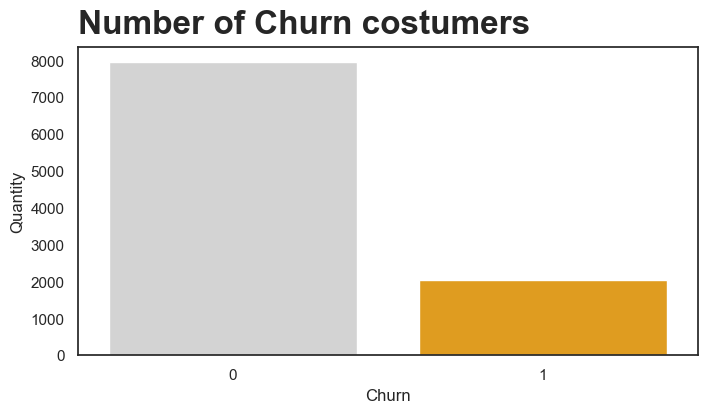

In [44]:
sns.set(style='white', rc={'figure.figsize': (8, 4)})

sns.countplot(data = data, x = 'Exited', palette = ['#D3D3D3', 'orange'])
plt.title('Number of Churn costumers', 
          fontweight="bold", 
          size = 24, 
          loc = 'left', 
          pad = 10)

plt.ylabel('Quantity', size =12)
plt.xlabel('Churn', size= 12)
plt.show()

In [45]:
data.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

### Categorical Variables

- **Costumers are mostly from france**
- **Most costumers have card**
- **Costumer have 1 to 2 products**

The rest of the variables are well distributed

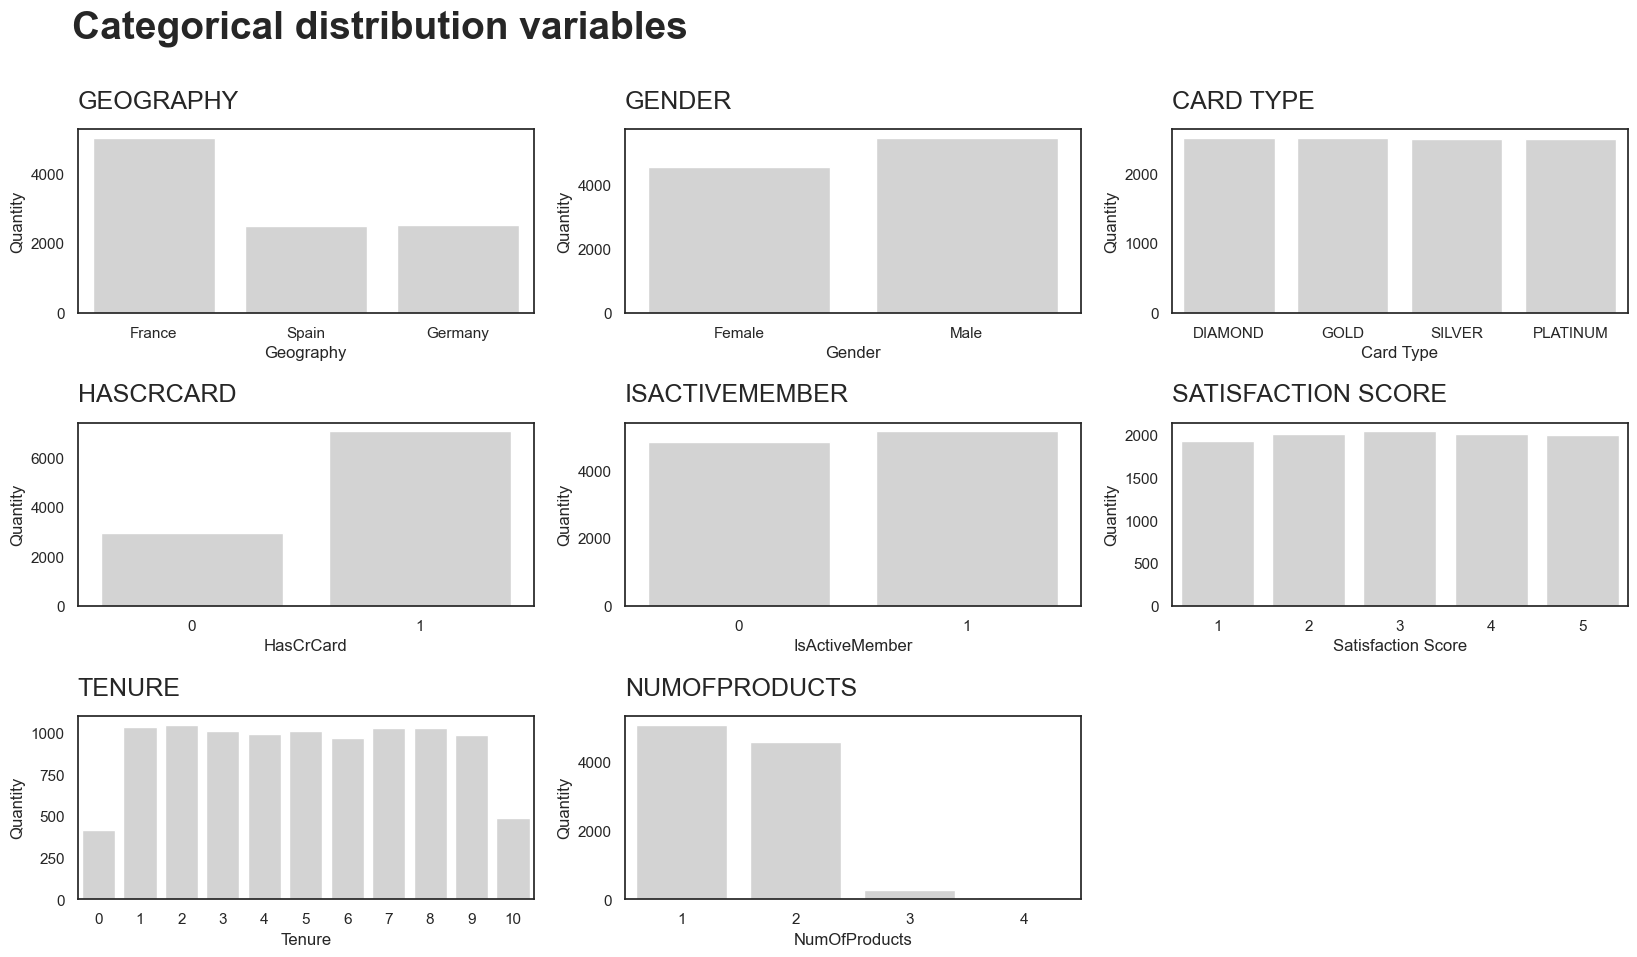

In [46]:
categorical_cols = ['Geography', 'Gender', 'Card Type', 'HasCrCard', 'IsActiveMember', 'Satisfaction Score', 'Tenure', 'NumOfProducts']

plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.6)
plt.suptitle("Categorical distribution variables", fontsize=28,fontweight ='bold', y=1., x = 0.276)

for n, col in enumerate(categorical_cols):
    # add a new subplot iteratively
    ax = plt.subplot(3, 3, n + 1)

    sns.countplot(data = data, x = col,  palette = ['#D3D3D3'])

    # chart formatting
    ax.set_title(f'{col.upper()}', fontdict = {'fontsize' : 18}, loc = 'left', pad = 15)
    ax.set_xlabel(col)
    ax.set_ylabel('Quantity')

plt.show()

### Categorical variables X Churn:

- **German costumer have the highest churn rate**

- Gender seems to play a role in exiting the bank, **female costumer are more likely to exited the bank**.

- **Card type seems to not have much affect on churn rate**

Reference to subplotting: https://engineeringfordatascience.com/posts/matplotlib_subplots/

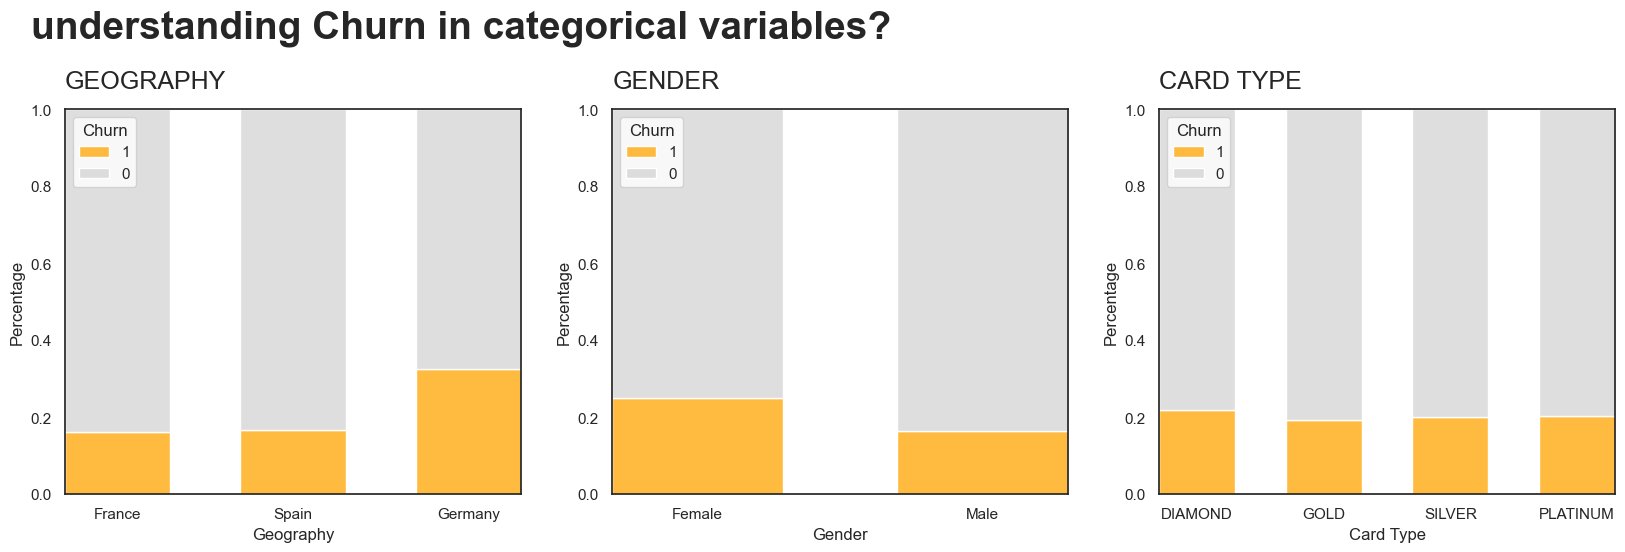

In [47]:
categorical_cols = data.dtypes[data.dtypes == 'object'].index.to_list()

plt.figure(figsize=(20, 5))
plt.subplots_adjust(hspace=1)
plt.suptitle("understanding Churn in categorical variables?", fontsize=28,fontweight ='bold', y=1.08, x = 0.323)

for n, col in enumerate(categorical_cols):
    # add a new subplot iteratively
    ax = plt.subplot(1, 3, n + 1)

    sns.histplot(data = data, x = col,  hue = 'Exited', palette = ['#D3D3D3', 'orange'], stat="probability", multiple="fill", shrink = 0.6)

    # chart formatting
    ax.legend(title = 'Churn', loc='upper left', labels = ['1', '0'])
    ax.set_title(f'{col.upper()}', fontdict = {'fontsize' : 18}, loc = 'left', pad = 15)
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage')

plt.show()

### Continuos variables

**No column follows a normal distribution, therefore we are going to use normalization as the scaling technique**

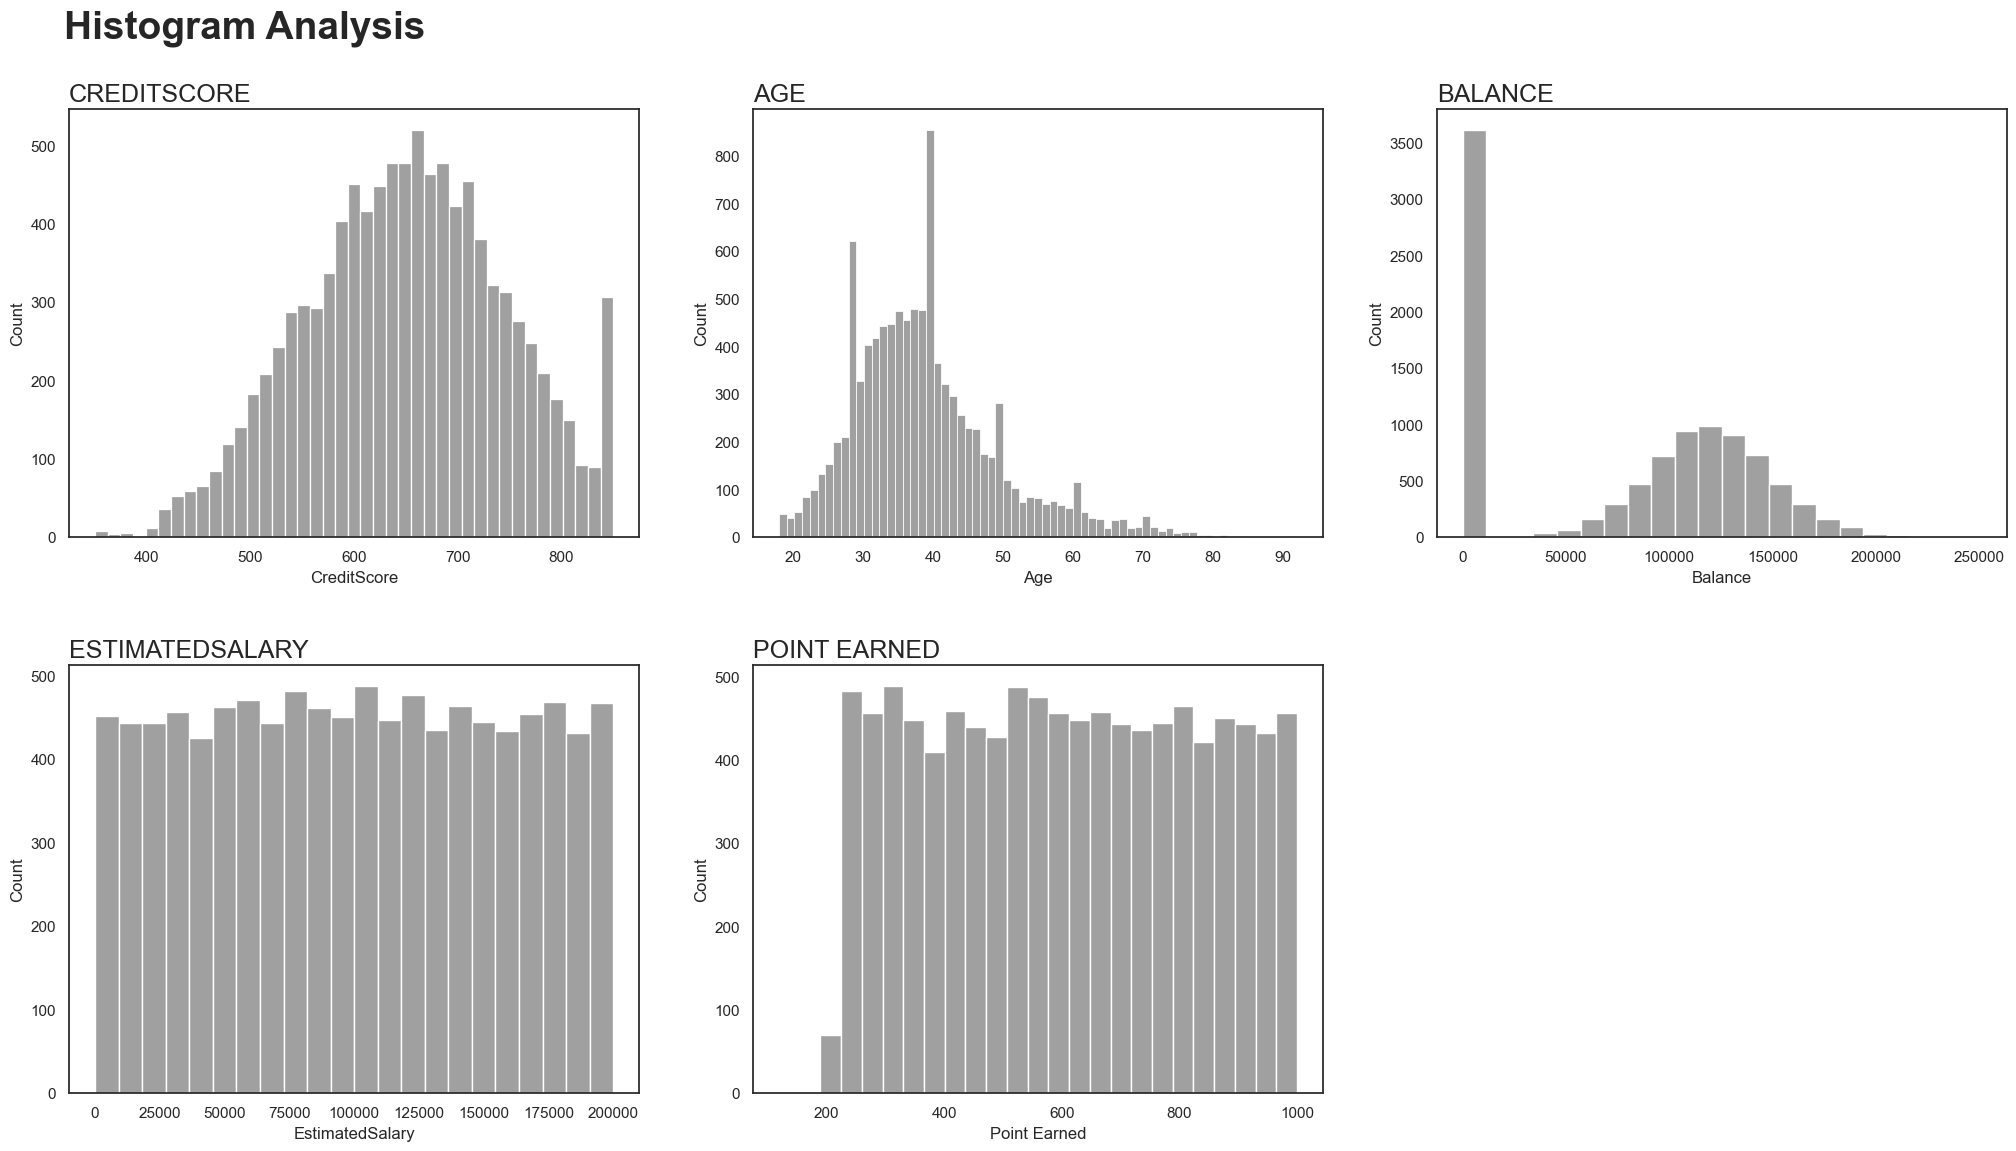

In [48]:
hist_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']

plt.figure(figsize=(25, 20))
plt.subplots_adjust(hspace=0.3)
plt.suptitle("Histogram Analysis", fontsize=28,fontweight ='bold', y=0.93, x = 0.195)

for n, col in enumerate(hist_cols):
    # add a new subplot iteratively
    ax = plt.subplot(3, 3, n + 1)

    sns.histplot(data = data, x = col,  color = 'grey', ax = ax)

    # chart formatting
    ax.set_title(f'{col.upper()}', fontdict = {'fontsize' : 18}, loc = 'left')
    ax.set_xlabel(col)

plt.show()

Testing if Balance and CreditScore are normal distributions:

*null hypothesis: x comes from a normal distribution*

[normaltest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)

In [49]:
distribution_test_col = ['Balance', 'CreditScore']

for col in distribution_test_col:
    alpha = 0.05
    k2, p = normaltest(data[col])

    if p < alpha: # null hypothesis: x comes from a normal distribution
        print(f"{col}: The null hypothesis can be rejected")
    else:
        print(f"{col}: The null hypothesis cannot be rejected")

Balance: The null hypothesis can be rejected
CreditScore: The null hypothesis can be rejected


**Credit Score and Age have a few outliers, but we will leave them for now**

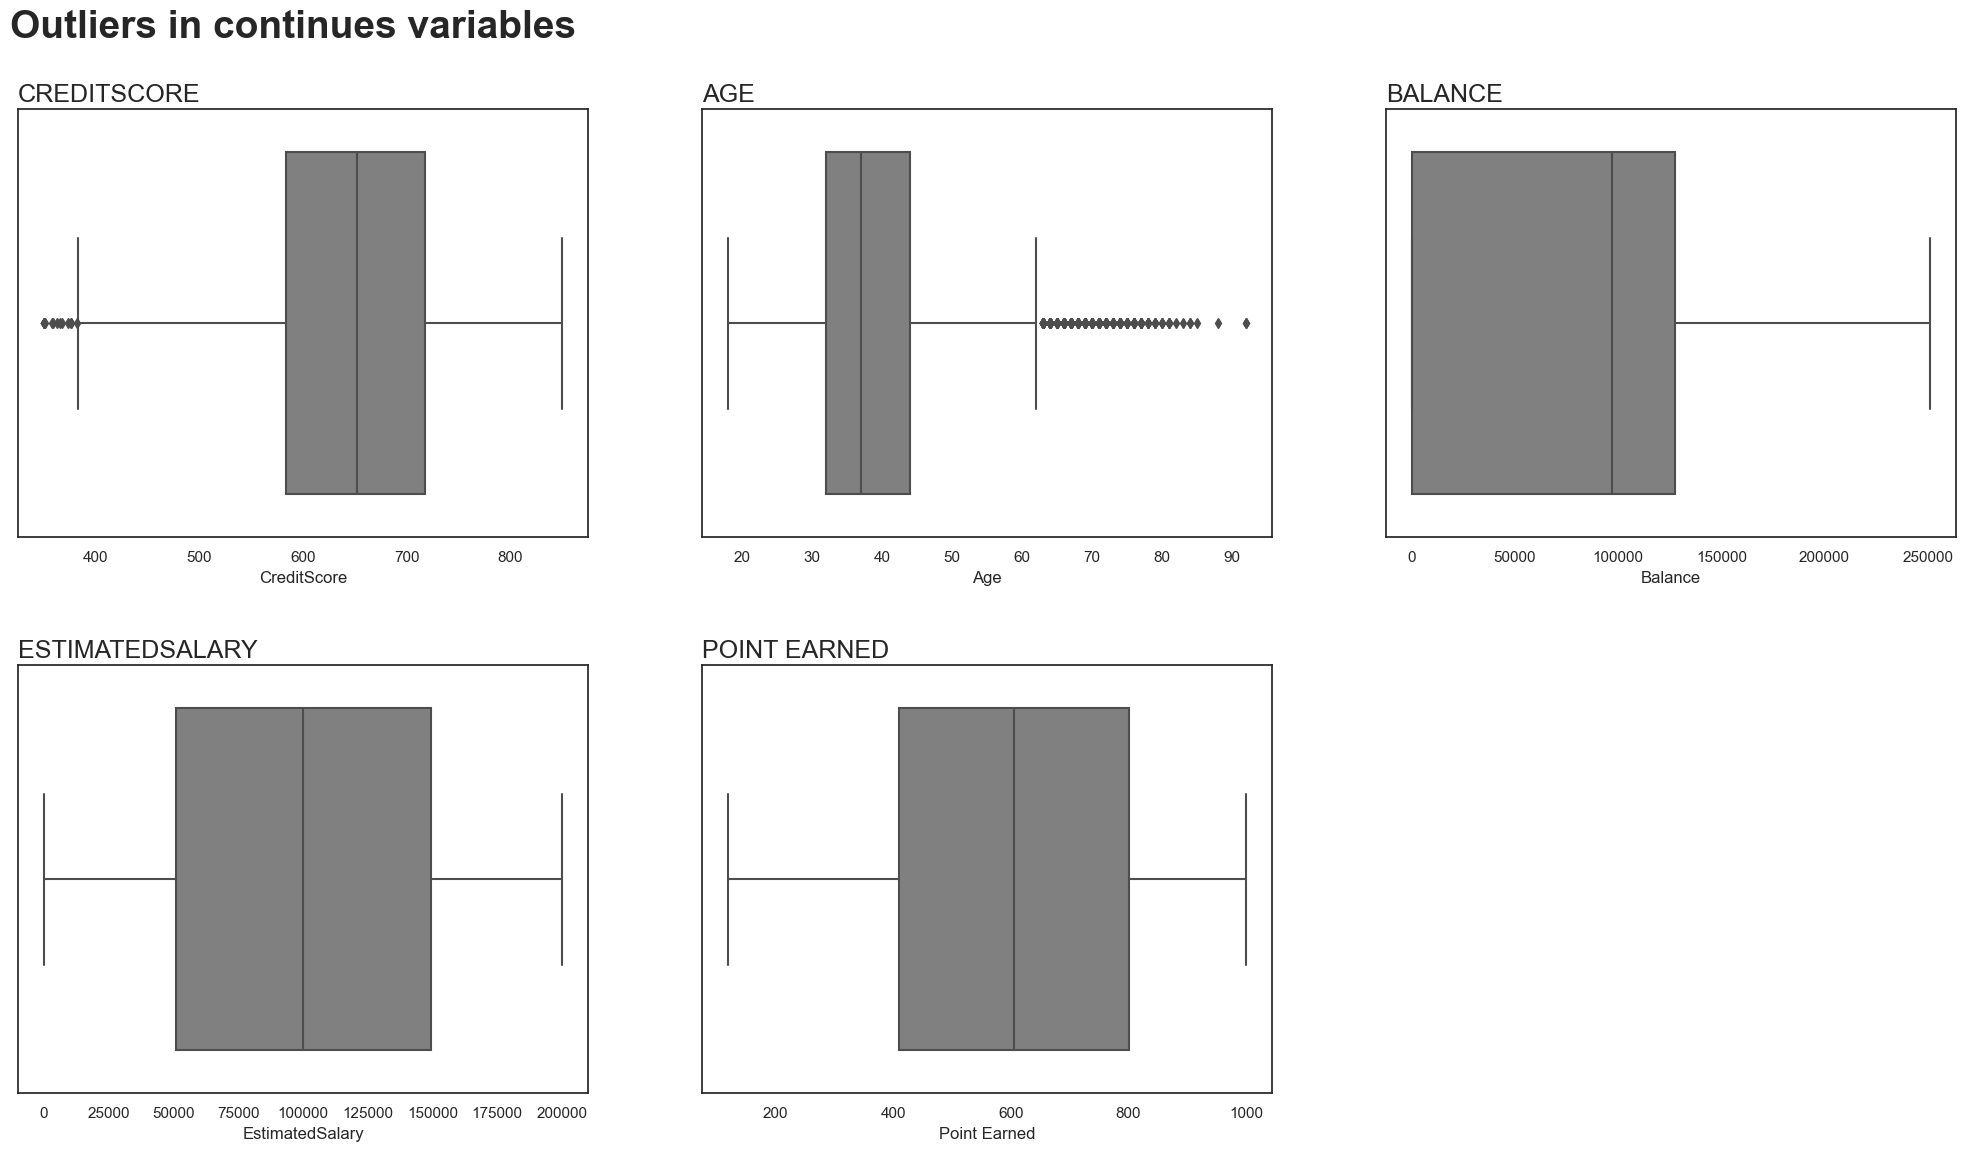

In [50]:
hist_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']

plt.figure(figsize=(25, 20))
plt.subplots_adjust(hspace=0.3)
plt.suptitle("Outliers in continues variables", fontsize=28,fontweight ='bold', y=0.93, x = 0.235)

for n, col in enumerate(hist_cols):
    # add a new subplot iteratively
    ax = plt.subplot(3, 3, n + 1)

    sns.boxplot(data = data, x = col,  color = 'grey', ax = ax)

    # chart formatting
    ax.set_title(f'{col.upper()}', fontdict = {'fontsize' : 18}, loc = 'left')
    ax.set_xlabel(col)

plt.show()

## ``3. Pre-Processing``

The pre-processing will consist in 3 steps:

- Enconding
- Balancing
- Scaling

### Enconding

In [51]:
features = data.drop(columns=['CustomerId', 'Exited'])
labels = data['Exited']

In [52]:
categorical_col = ['Gender', 'Card Type', 'Geography']
one_hot_enconder = OneHotEncoder(dtype=int, drop='if_binary')

encoded_features = one_hot_enconder.fit_transform(features[categorical_col]).toarray()
encoded_features = pd.DataFrame(encoded_features, columns = one_hot_enconder.get_feature_names_out(input_features=categorical_col))
encoded_features.head(2)

,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Geography_France,Geography_Germany,Geography_Spain
0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1


In [53]:
encoded_features = pd.concat([features.drop(columns=categorical_col), encoded_features], axis = 1)
encoded_features.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,2,464,0,1,0,0,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,3,456,0,1,0,0,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,3,377,0,1,0,0,0,1,0,0


### Balancing: Over Sampling

In [54]:
SEED = 50
np.random.seed(SEED)
sm = SMOTE(random_state=SEED)

res_features, res_labels = sm.fit_resample(encoded_features, labels)
res_labels.value_counts()

1    7962
0    7962
Name: Exited, dtype: int64

### Scaling

Scaling address the issue of wide-raging data by scaling features to similar scales, which:

- **Prevents features from dominating the learning process based solely on its scale**

In [55]:
scal_col = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned', 'Tenure', 'Satisfaction Score']

# Scaling specific columns using Normalization
min_max_scaler = MinMaxScaler()

res_features[hist_cols] = min_max_scaler.fit_transform(res_features[hist_cols])
res_features.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,15924.0,0.599191,0.183287,0.0,0.476000,0.602000,0.726000,1.0
Age,15924.0,0.309894,0.135235,0.0,0.216216,0.297297,0.391892,1.0
Tenure,15924.0,4.820522,2.733478,0.0,3.000000,5.000000,7.000000,10.0
Balance,15924.0,0.325882,0.244695,0.0,0.000000,0.410515,0.514235,1.0
NumOfProducts,15924.0,1.421628,0.573614,1.0,1.000000,1.000000,2.000000,4.0
HasCrCard,15924.0,0.630306,0.482737,0.0,0.000000,1.000000,1.000000,1.0
IsActiveMember,15924.0,0.366930,0.481982,0.0,0.000000,0.000000,1.000000,1.0
EstimatedSalary,15924.0,0.499960,0.288708,0.0,0.251791,0.500319,0.748095,1.0
Satisfaction Score,15924.0,2.859709,1.324236,1.0,2.000000,3.000000,4.000000,5.0
Point Earned,15924.0,0.552433,0.239864,0.0,0.353008,0.552781,0.749432,1.0


## ``4. Simple Model Selection``

In [65]:
x_train, x_test, y_train, y_test = train_test_split(res_features, res_labels, train_size = 0.8, stratify = res_labels)

def fit_model(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"{type(model).__name__}")
    print(f"Accuracy: {accuracy}\n F1-Score: {f1}\n Precision: {precision}\n Recal: {recall}\n----------------------------")

In [66]:
dt = DecisionTreeClassifier(random_state=SEED)
lr = LogisticRegression(random_state=SEED, max_iter = 1000)
rfc = RandomForestClassifier(random_state=SEED)
knnc = KNeighborsClassifier(n_neighbors=6)

models = [dt, lr, rfc, knnc]

for model in models:
    fit_model(model)

DecisionTreeClassifier
Accuracy: 0.8285714285714286
 F1-Score: 0.8326180257510729
 Precision: 0.8131736526946107
 Recal: 0.8530150753768844
----------------------------
LogisticRegression
Accuracy: 0.862480376766091
 F1-Score: 0.8524258760107817
 Precision: 0.9193313953488372
 Recal: 0.7945979899497487
----------------------------
RandomForestClassifier
Accuracy: 0.9001569858712716
 F1-Score: 0.8987905792488862
 Precision: 0.9109677419354839
 Recal: 0.8869346733668342
----------------------------
KNeighborsClassifier
Accuracy: 0.847723704866562
 F1-Score: 0.8376297288249079
 Precision: 0.896774193548387
 Recal: 0.7858040201005025
----------------------------


c:\Users\ferna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Best model: RANDOM FOREST CLASSIFIER



**But can we trust it?**

In our fit_model function, we performed a single division of our data into training and testing sets, which means we might just have obtained a relatively easy test sample.


To address this issue and avoid relying solely on one split, we can utilize **cross-validation (CV)**. By partitioning our data into k-folds and performing training and testing on multiple folds, we can obtain a more reliable estimation of our model's performance **(reducing Potential Sampling Variation)**. 

We can use CV both to tune Hyperparameters and Model Selection in an **Nested CV loop**.

## **``5. Nested CV``**

Nested Cross validation consits of two CV process: 

- **Inner CV** (Model Selection)
- **Outer CV** (Hyperparamter Tuning)

In the Outer CV, our dataset is divided into k-folds. During each iteration of the Outer CV, the Inner CV is performed, which further divides the training data from the Inner CV into k-folds for each hyperparameter setting (as illustrated in the image below). The hyperparameter models are trained on the k-folds of the inner loop, and their results are averaged. The model with the best average performance is chosen to be trained and tested in the Outer loop. This process is repeated for each fold in the Outer CV.


[My notes about Nested CV](https://lacerdash.notion.site/CV-and-Nested-CV-38ed644da89c4faca445dc17e496e204?pvs=4)

![Image Description](Nested_CV.png)

### Model Selection with CV

Repeting our Simple Model Selection but now using **cross_val_score**, we can see that the overall ranking ramained the same:

1. Random Forest Classifier
2. Logistic Regression
3. KNeighbors Classifier
4. Decision Tree Classifier

But we now have 5 results per model, which gives us a better performance estimation of our model with real world data.

In [75]:
outer_cv = KFold(n_splits = 5, shuffle=True)
for model in models:
    scores = cross_val_score(model, res_features, res_labels, cv = outer_cv, scoring='accuracy')
    print(model)
    print(f'Mean accuracy:{scores.mean().round(3)}')
    print(f'Scores: {scores.round(3)}\n')

DecisionTreeClassifier(random_state=50)
Mean accuracy:0.834
Scores: [0.828 0.84  0.835 0.833 0.833]

LogisticRegression(max_iter=1000, random_state=50)
Mean accuracy:0.861
Scores: [0.857 0.851 0.867 0.872 0.856]

RandomForestClassifier(random_state=50)
Mean accuracy:0.899
Scores: [0.904 0.904 0.897 0.891 0.901]



c:\Users\ferna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\ferna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNeighborsClassifier(n_neighbors=6)
Mean accuracy:0.845
Scores: [0.843 0.852 0.851 0.836 0.843]



c:\Users\ferna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Cross Validation Illustration Image

<img src="CV.png" alt="Cross Validation Ilustration" width="500" height="300" />

### Hyperparameter Tuning with CV

Now, we will use **RandomizedSearchCV** to explore a grid of hyperparameters for two models: *RandomForest* and *KNeighborsClassifier*.

- *RandomForest:* Our best model from the hyperparamter tuning had an 0.877 accuracy, while the default setting of the model in our last CV had an 0.899.

- *KNeighborsClassifier:* Found a slighty better hyperparameter setting incresing from 0.845 to 0.854 our accuracy.



RandomForest

In [58]:
param_grid = {'max_depth' : [3, 5, 7, 10, None],
              'min_samples_leaf' : randint(2,120),
              'criterion': ['gini', 'entropy'],
              'min_samples_split': randint(2,120)
              }

inner_cv = KFold(n_splits = 5, shuffle=True)

hp_search = RandomizedSearchCV(RandomForestClassifier(), 
                               param_distributions=param_grid, 
                               n_iter= 20, 
                               cv = inner_cv,
                               random_state=SEED)

hp_search.fit(res_features, res_labels)
results = pd.DataFrame(hp_search.cv_results_)
results.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,0.944918,0.029941,0.029136,0.000327,entropy,None,8,67,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.877551,0.886342,0.871272,0.870958,0.879397,0.877104,0.005703,1
7,1.034543,0.290840,0.043909,0.011349,gini,10,8,21,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.881005,0.884458,0.872214,0.865620,0.878455,0.876350,0.006695,2
13,1.216220,0.029935,0.051599,0.004124,gini,10,30,26,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.864678,0.870644,0.860911,0.857771,0.871231,0.865047,0.005287,3
4,0.649137,0.006017,0.026168,0.000200,gini,10,28,92,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.862166,0.873783,0.859969,0.856829,0.870917,0.864733,0.006510,4
5,0.647106,0.003563,0.026470,0.000376,gini,None,45,33,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.860597,0.868132,0.856515,0.852747,0.863379,0.860274,0.005334,5


In [59]:
best_estimator = hp_search.best_estimator_
print(best_estimator)
print(f'Best model accuracy : {hp_search.best_score_.round(3)}')

RandomForestClassifier(criterion='entropy', min_samples_leaf=8,
                       min_samples_split=67)
Best model accuracy : 0.877


KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors': randint(5, 10),
            'weights': ['uniform','distance'],
            'algorithm': ['auto','ball_tree', 'kd_tree', 'brute'],
            'metric' : ['euclidean', 'minkowski', 'chebyshev', 'braycurtis']
            }

inner_cv = KFold(n_splits = 5, shuffle=True)

hp_search = RandomizedSearchCV(KNeighborsClassifier(), 
                               param_distributions=param_grid, 
                               n_iter= 50, 
                               cv = inner_cv,
                               random_state=SEED)

hp_search.fit(res_features, res_labels)
results = pd.DataFrame(hp_search.cv_results_)
results.sort_values(by='mean_test_score', ascending=False).head()

In [86]:
best_estimator = hp_search.best_estimator_
print(best_estimator)
print(f'Best model accuracy : {hp_search.best_score_.round(3)}')

KNeighborsClassifier(algorithm='ball_tree', metric='braycurtis', n_neighbors=7,
                     weights='distance')
Best model accuracy : 0.854


### **Nested CV loop**

Now it is time to combine both techniques, **RandomizedSearchCV** and **cross_val_score**, in a Nested CV loop.

In [62]:
inner_cv = KFold(n_splits = 5, shuffle=True)
outer_cv = KFold(n_splits = 5, shuffle=True)

param_grid = {'max_depth' : [3, 5, 7, 10, None],
              'min_samples_leaf' : randint(2,120),
              'criterion': ['gini', 'entropy'],
              'min_samples_split': randint(2,120)
              }

hp_search = RandomizedSearchCV(RandomForestClassifier(), 
                               param_distributions=param_grid, 
                               n_iter= 20, 
                               cv = inner_cv,
                               random_state=SEED)

scores = cross_val_score(hp_search, res_features, res_labels, cv = outer_cv, scoring='accuracy')
print(f'Mean Score: {scores.mean().round(3)}')
print(f'Scores ---> {scores.round(3)}')

Mean Score: 0.878
Scores ---> [0.885 0.871 0.865 0.886 0.883]


The most important features for the Random Forest were: 
- Age
- IsActiveMember
- NumOfProducts
- Gender_Male
- Geography_France

Age and IsActiveMember were also the 2 most correlated features with the target variable Churn in the HeatMap.

In [ ]:
features_importance = best_estimator.feature_importances_
features_importance = pd.DataFrame(features_importance, index = res_features.columns, columns =['Importance'])
features_importance.sort_values(by='Importance', ascending = False).style.background_gradient(cmap ='YlOrBr')

,Importance
Age,0.204420
IsActiveMember,0.150743
NumOfProducts,0.106046
Gender_Male,0.079290
Geography_France,0.077045
Geography_Spain,0.057357
Balance,0.045491
Card Type_GOLD,0.038922
Card Type_PLATINUM,0.038305
Geography_Germany,0.038099


## `Extra`

Plotting confunsion matrix based on the cross validation process.

In [87]:
res_features_array = res_features.values
res_labels_array = res_labels.values

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix

conf_matrix_list_of_arrays = []
inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': randint(2, 120),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': randint(2, 120)
}

hp_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_grid,
    n_iter=20,
    cv=inner_cv,
    random_state=SEED
)

# Performing nested cross-validation and compute confusion matrices without using cross_val_score
for train_index, test_index in outer_cv.split(res_features):
    X_train, X_test = res_features.iloc[train_index], res_features.iloc[test_index]
    y_train, y_test = res_labels.iloc[train_index], res_labels.iloc[test_index]

    hp_search.fit(X_train, y_train)
    y_pred = hp_search.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_list_of_arrays.append(conf_matrix)

# Compute average confusion matrix
average_cm = np.mean(conf_matrix_list_of_arrays, axis=0)
average_cm

array([[1442.4,  150. ],
       [ 238.8, 1353.6]])

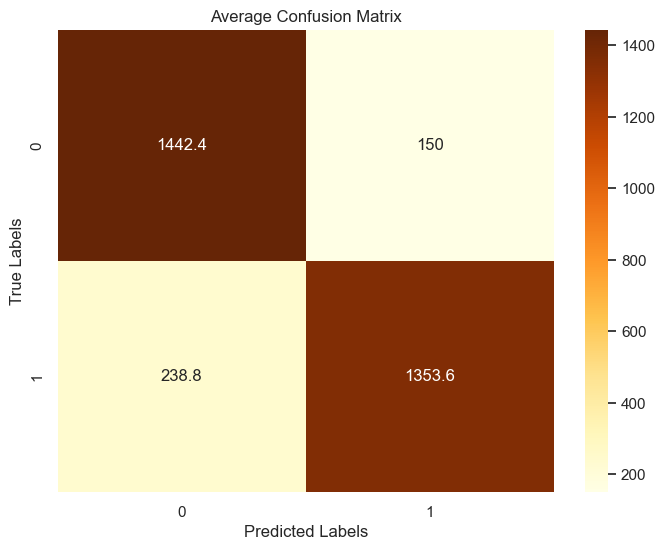

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, cmap='YlOrBr', fmt='g')
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()